In [1]:
import pandas as pd

df = pd.read_csv("data/labeling_in_progress_2023_12_28_13_20.csv")

## используем репозиторий segmentation_tools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from segmentation_tools_custom import SWAB, bottom_up, sliding_window, top_down


amount_of_plots = 20


for i in range(amount_of_plots):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)]).reshape(-1, 1)
    buy_sell_labels = [df.at[i, f'sep_point_{j + 1}'] for j in range(25)]

    plt.figure(figsize=(10, 5))  # Измените значения ширины и высоты по вашему усмотрению

    max_error = 0.12  # Максимально допустимая ошибка сегментации
    buffer_size = 10   # Размер буфера
    segmenter = bottom_up()
    # Настройка параметров сегментации linear_interpolation or linear_regression
    plr = "linear_interpolation"  # Метод аппроксимации: линейная регрессия
    error_type = "mse"  # Тип ошибки: максимальная ошибка

    # Применение алгоритма сегментации к временному ряду
    segmenter.fit(norm_prices, max_error, plr, error_type)

    # Визуализация результата
    segmenter.segment_plot()

    # Расчет и визуализация ошибок
    errors = []
    for segment in segmenter.segments:
        # Вычисление ошибки для каждого сегмента
        segment_error = segmenter.calculate_error(segment.data)
        print(segment_error)
        errors.append(segment_error)

    print(errors)

    # Вывод границ сегментов
    print("Границы сегментов:", segmenter.segment_borders)
    print(f"true segments: {buy_sell_labels}")


## используем репозиторий SWAB

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from SWAB.semgentation import Segmentation  # Импорт класса Segmentation из репозитория SWAB
from SWAB.approximation import Approximation  # Импорт класса Approximation для методов аппроксимации

# Предполагаем, что df - это ваш DataFrame с данными
# и что он уже загружен в вашем коде

# Инициализация классов Segmentation и Approximation
segmentation = Segmentation()
approximation = Approximation()

plr = "linear_regression"

amount_of_plots = 20


for i in range(amount_of_plots):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)])

    buy_sell_labels = [df.at[i, f'sep_point_{j + 1}'] for j in range(25)]

    plt.figure(figsize=(10, 5))

    max_error = 0.12
    buffer_size = 10
    plr = "linear_interpolation"
    error_type = "mse"

    # Выбор метода аппроксимации и функции вычисления ошибки
    create_segment = approximation.linear_interpolation if plr == "linear_interpolation" else approximation.linear_regression
    compute_error = approximation.sumsquerred_error

    # Применение алгоритма сегментации к временному ряду
    segments = segmentation.bottom_up_segmentation(data, max_error, create_segment, compute_error)


    # Визуализация результата
    for segment in segments:
        plt.plot(range(segment[0], segment[2] + 1), norm_prices[segment[0]:segment[2] + 1], marker='o')
    plt.title(f"Segmentation for Time Series {i}")
    plt.show()

    # Расчет и вывод ошибок
    errors = [compute_error(approximation, norm_prices, segment) for segment in segments]
    print("Ошибки сегментов:", errors)

    # Вывод границ сегментов
    segment_borders = [segment[0] for segment in segments] + [segments[-1][2]]
    print("Границы сегментов:", segment_borders)
    print(f"True segments: {buy_sell_labels}")


TypeError: Approximation.linear_interpolation() takes 3 positional arguments but 4 were given

<Figure size 720x360 with 0 Axes>

## piecewise segmentation tools

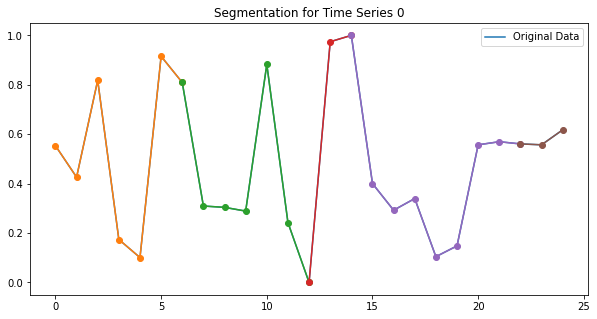

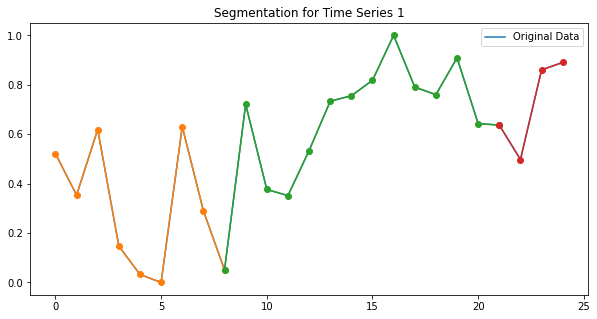

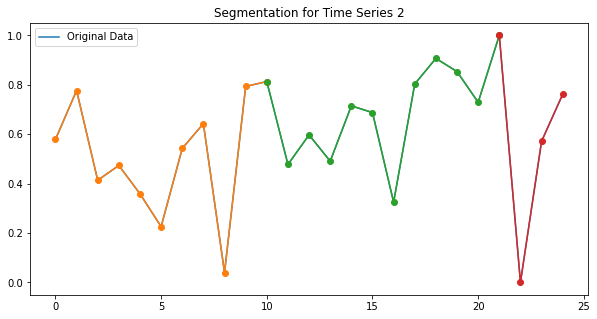

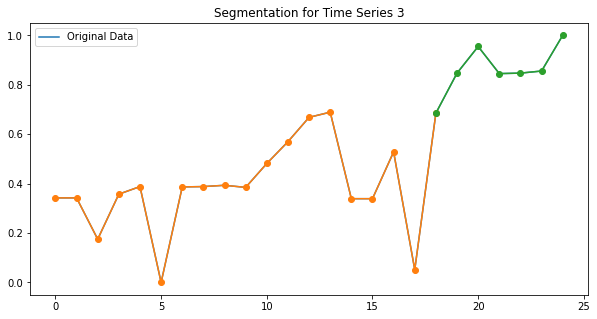

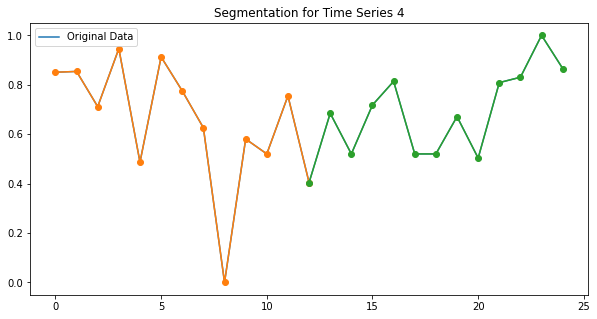

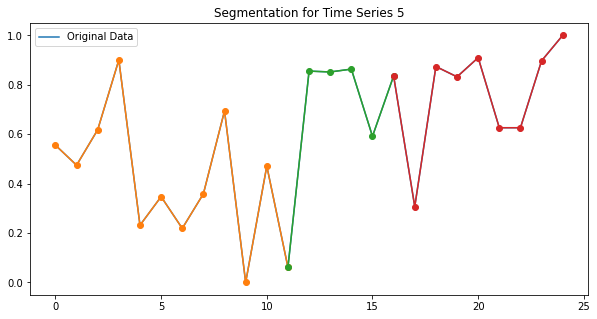

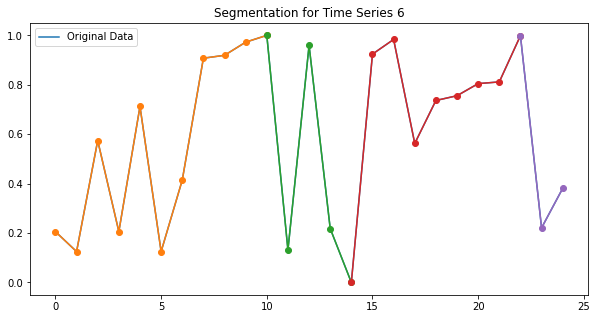

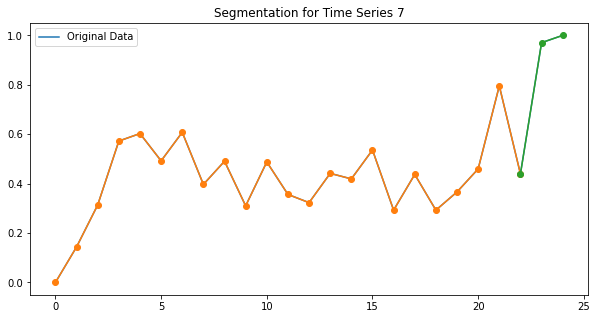

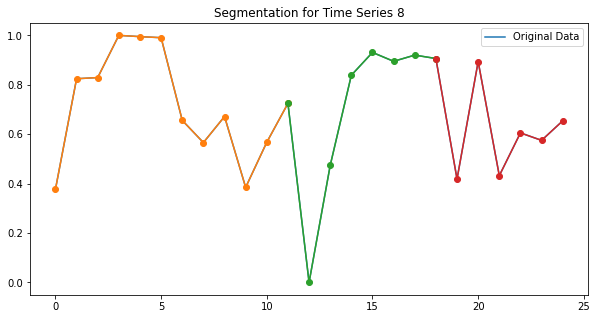

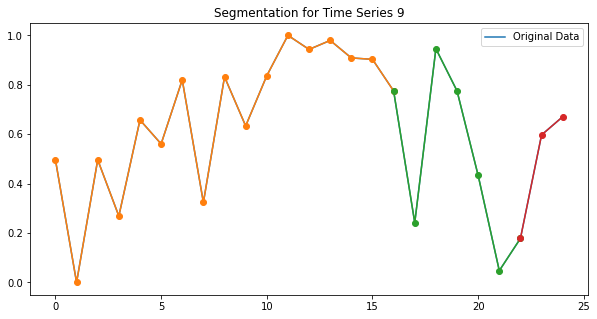

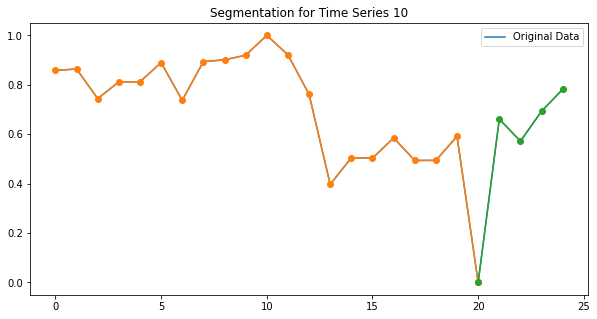

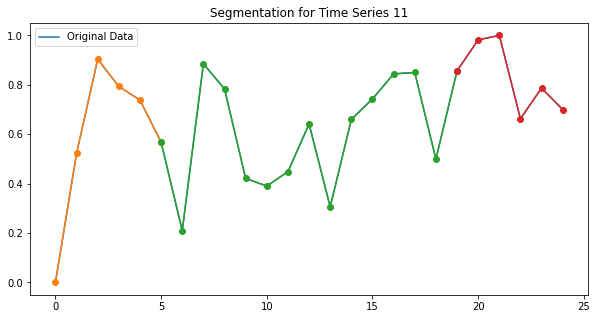

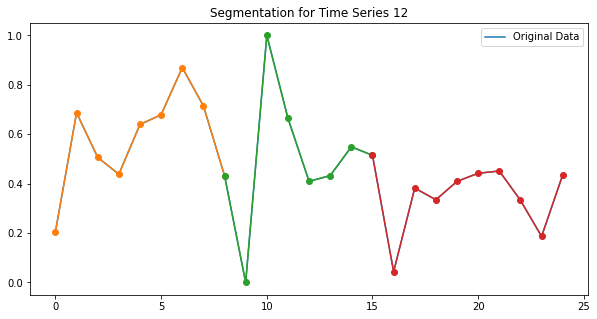

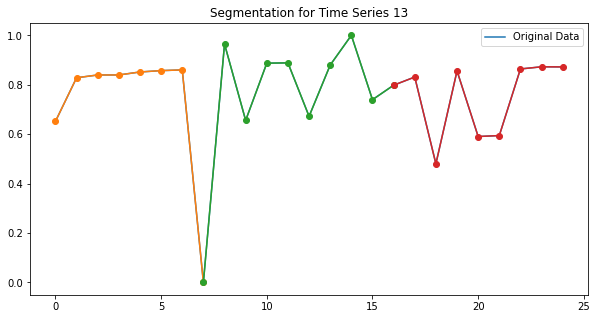

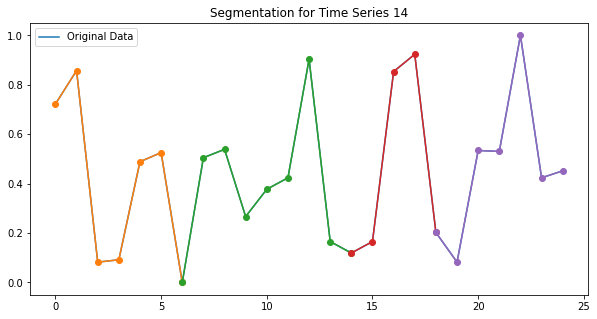

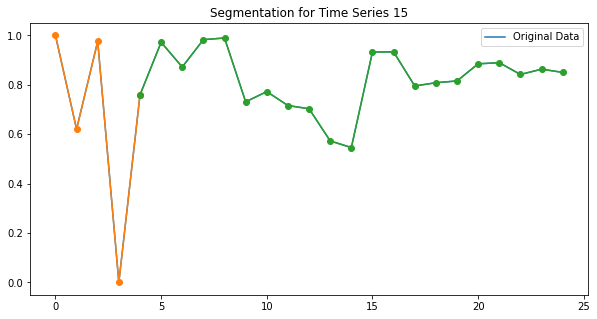

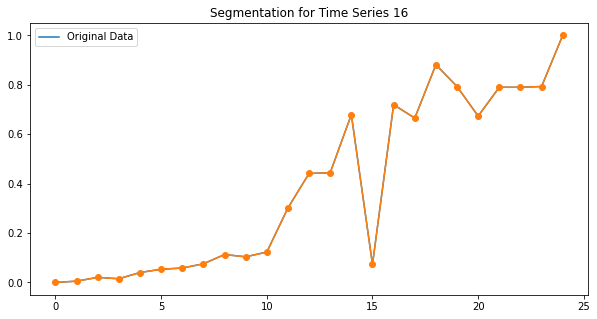

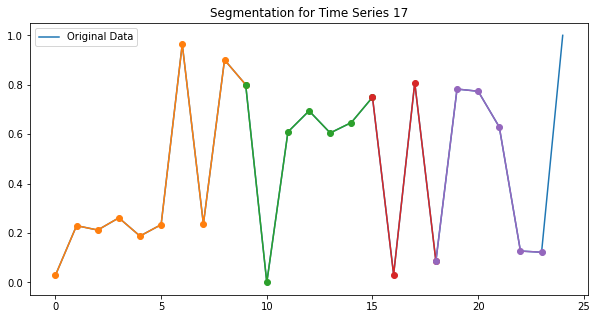

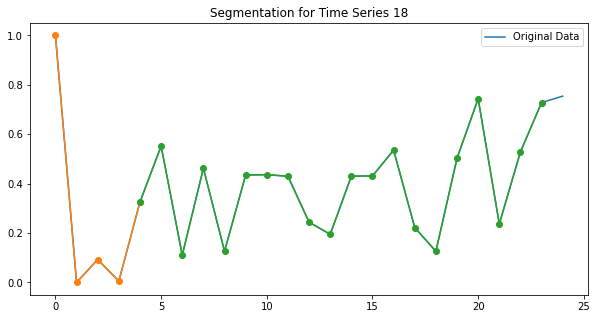

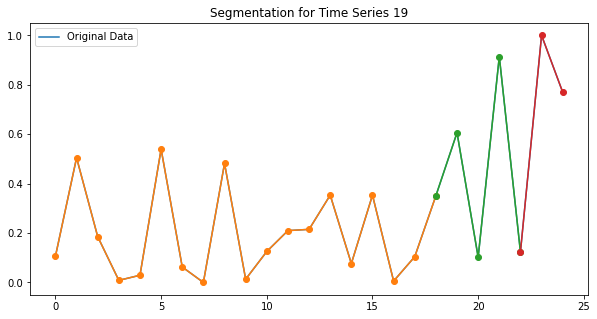

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from piecewise_segmentation_tools.segment import slidingwindowsegment
from piecewise_segmentation_tools.fit import regression, sumsquared_error, interpolate

amount_of_plots = 20

for i in range(amount_of_plots):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)])
    
    max_error = 0.5  # Максимально допустимая ошибка сегментации

    # Применение алгоритма скользящего окна к временному ряду
    segments = slidingwindowsegment(norm_prices, interpolate, sumsquared_error, max_error)

    # Визуализация результата
    plt.figure(figsize=(10, 5))
    plt.plot(norm_prices, label='Original Data')
    for segment in segments:
        plt.plot(range(segment[0], segment[2] + 1), norm_prices[segment[0]:segment[2] + 1], marker='o')
    plt.title(f"Segmentation for Time Series {i}")
    plt.legend()
    plt.show()
